In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_csv("onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


Cerchiamo quanti missin values ci sono in questo dataframe 

In [3]:
percentage_missing = df.isnull().sum() * 100 / len(df)
print(percentage_missing)

Age                           0.0
Gender                        0.0
Marital Status                0.0
Occupation                    0.0
Monthly Income                0.0
Educational Qualifications    0.0
Family size                   0.0
latitude                      0.0
longitude                     0.0
Pin code                      0.0
Output                        0.0
Feedback                      0.0
Unnamed: 12                   0.0
dtype: float64


Nessuno! Fantastico! è un dataset fatto bene, a parte per la colonna Unnamed: 12

In [4]:
df = df.drop("Unnamed: 12", axis=1)
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive


That's perfect!

Adesso i grafici

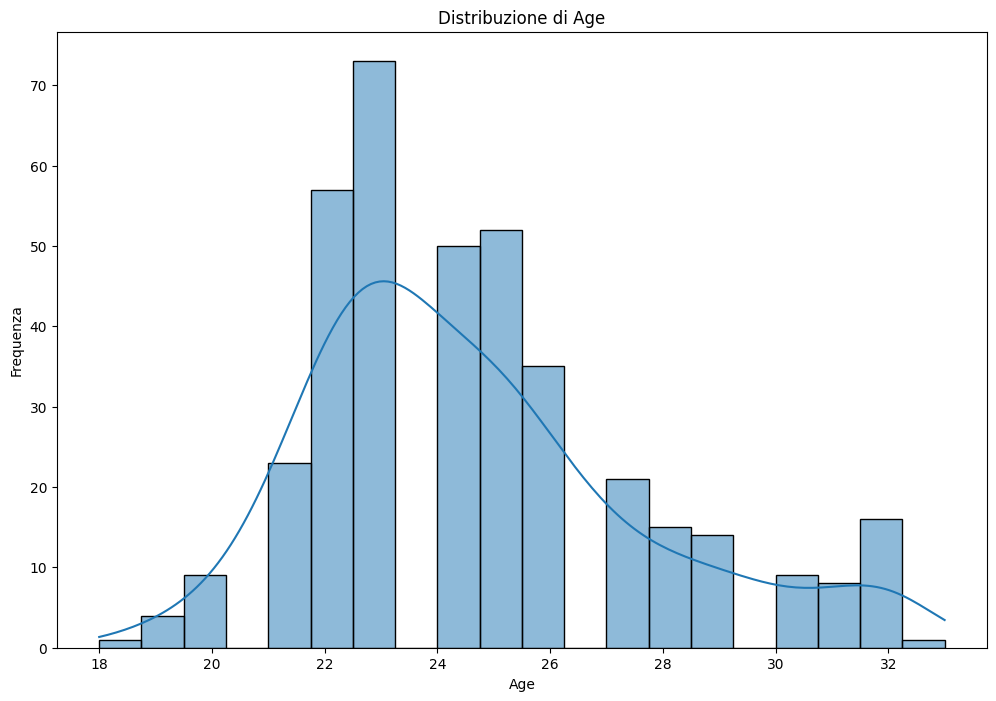

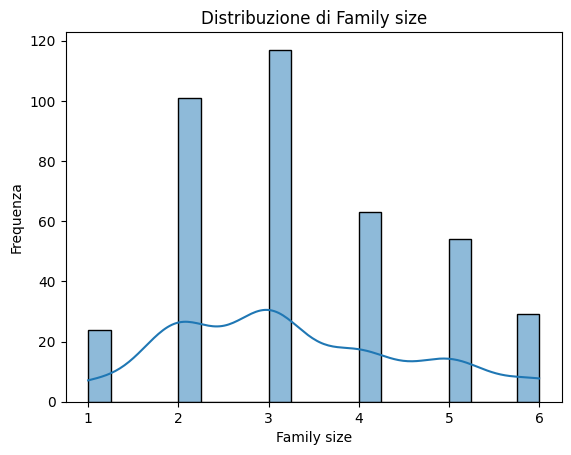

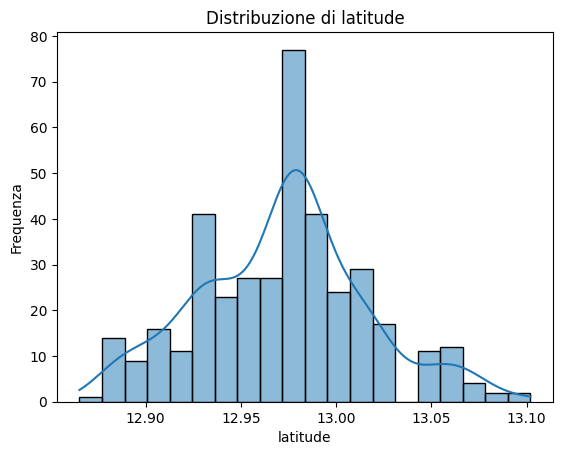

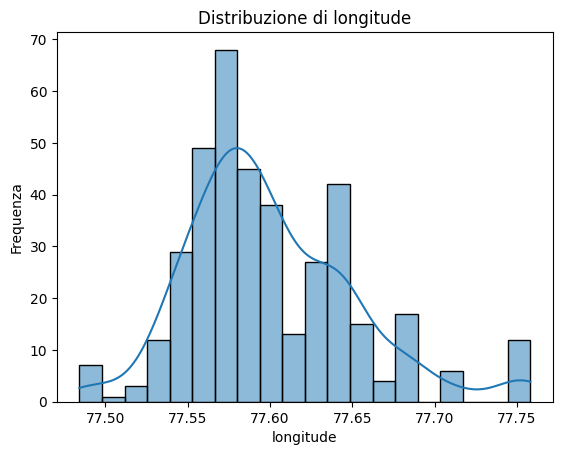

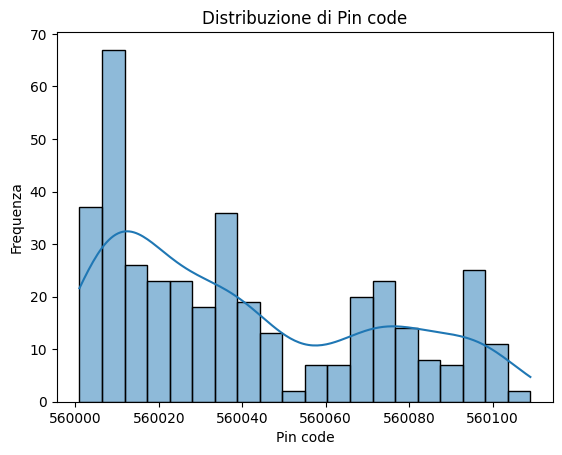

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume che il tuo nuovo DataFrame sia già definito come df2_cleaned
df1 = df
# Seleziona solo le colonne numeriche
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
for col in numeric_columns.columns:
    sns.histplot(data=df1, x=col, kde=True, bins=20)
    plt.title(f'Distribuzione di {col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()

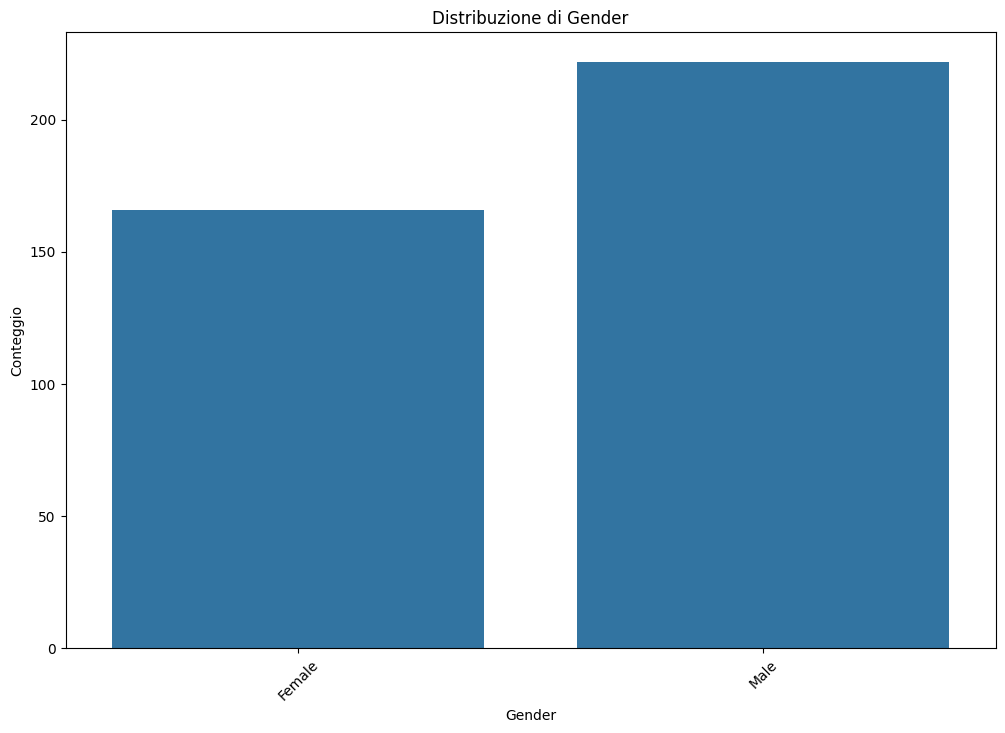

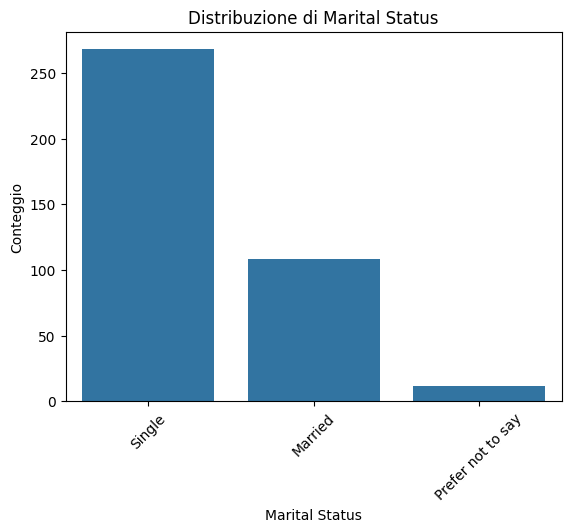

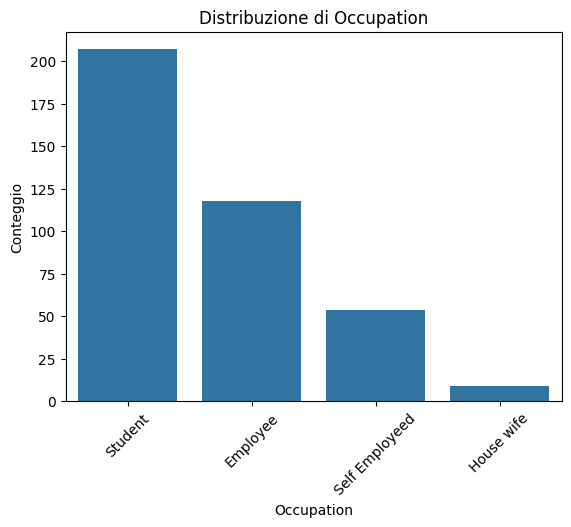

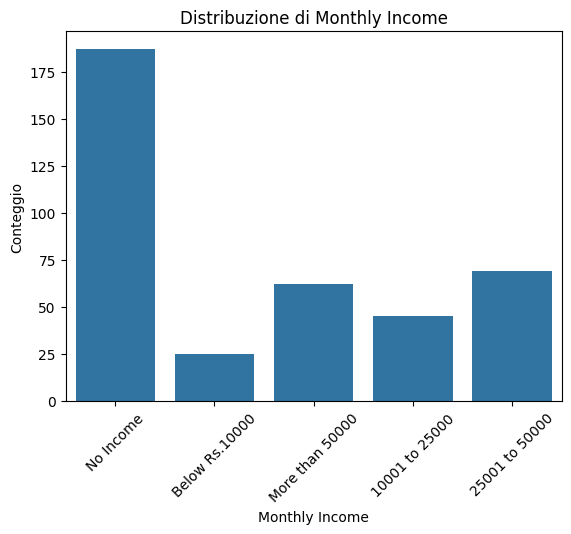

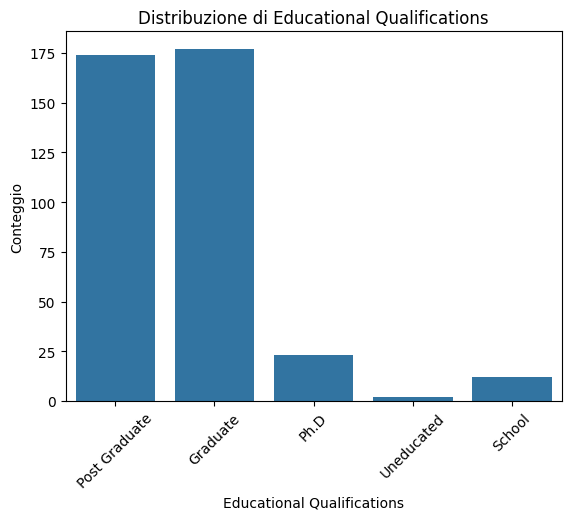

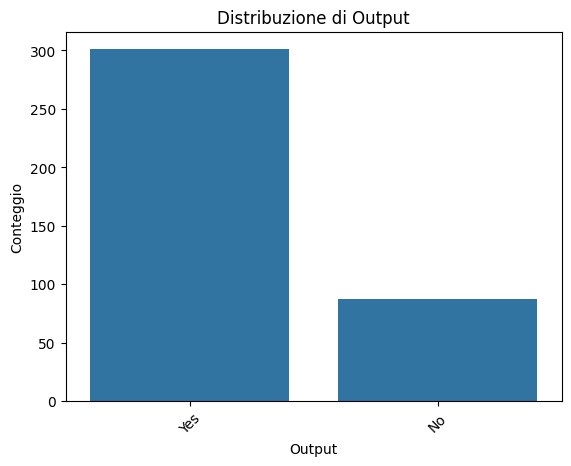

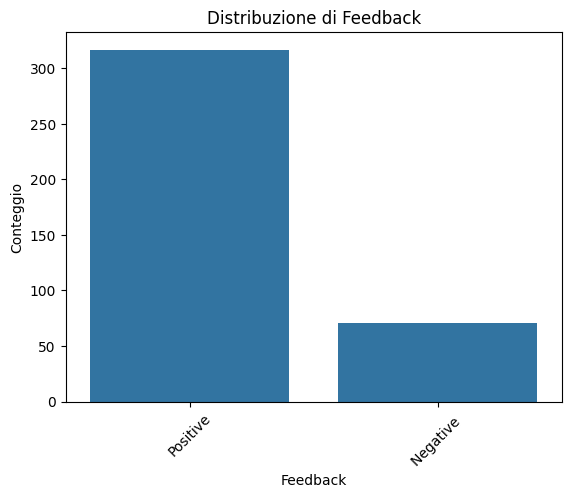

In [8]:
# Seleziona solo le colonne categoriche
categorical_columns = df1.select_dtypes(include=['object'])

plt.figure(figsize=(12, 8))
for col in categorical_columns.columns:
    sns.countplot(data=df1, x=col)
    plt.title(f'Distribuzione di {col}')
    plt.xlabel(col)
    plt.ylabel('Conteggio')
    plt.xticks(rotation=45)
    plt.show()

dobbiamo preparare i dati per darli ad un intelligenza artificiale

In [9]:
from sklearn.preprocessing import StandardScaler

# Seleziona solo le colonne numeriche nel DataFrame
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])

# Inizializza lo StandardScaler
scaler = StandardScaler()

# Applica lo scaling alle colonne numeriche
scaled_numeric_columns = scaler.fit_transform(numeric_columns)

# Crea un nuovo DataFrame con le colonne numeriche scalate
df2_scaled = pd.DataFrame(scaled_numeric_columns, columns=numeric_columns.columns)

# Visualizza il nuovo DataFrame scalato
df2_scaled

,Age,Family size,latitude,longitude,Pin code
0,-1.557620,0.532929,0.102224,-0.016759,-1.247274
1,-0.211614,-0.208205,0.111227,-0.445712,-0.992164
2,-0.884617,-0.208205,-0.381663,1.153112,-0.737055
3,-0.884617,2.015198,-0.557212,-0.751828,-0.673278
4,-0.884617,0.532929,0.291278,-0.913660,-0.960276
...,...,...,...,...,...
383,-0.548116,-0.949340,0.102224,-0.016759,-1.247274
384,-0.548116,0.532929,0.300280,2.104607,0.251493
385,-0.884617,1.274064,0.291278,-0.913660,-0.960276
386,-0.548116,-0.949340,0.111227,-0.445712,-0.992164


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Seleziona solo le colonne categoriche nel DataFrame
categorical_columns = df1.select_dtypes(include=['object'])

# Inizializza OneHotEncoder
encoder = OneHotEncoder()

# Applica l'encoding alle colonne categoriche e trasforma i dati
encoded_categorical_columns = encoder.fit_transform(categorical_columns)

# Ottieni i nomi delle categorie dall'encoder
encoded_categories = encoder.categories_

# Crea i nomi delle nuove colonne dopo l'encoding
encoded_column_names = []
for i, col in enumerate(categorical_columns.columns):
    encoded_column_names.extend([f"{col}_{category}" for category in encoded_categories[i]])

df2_encoded = pd.DataFrame(encoded_categorical_columns.toarray(), columns=encoded_column_names)

print(df2_encoded)

     Gender_Female  Gender_Male  Marital Status_Married  \
0              1.0          0.0                     0.0   
1              1.0          0.0                     0.0   
2              0.0          1.0                     0.0   
3              1.0          0.0                     0.0   
4              0.0          1.0                     0.0   
..             ...          ...                     ...   
383            1.0          0.0                     0.0   
384            1.0          0.0                     0.0   
385            1.0          0.0                     0.0   
386            0.0          1.0                     0.0   
387            0.0          1.0                     0.0   

     Marital Status_Prefer not to say  Marital Status_Single  \
0                                 0.0                    1.0   
1                                 0.0                    1.0   
2                                 0.0                    1.0   
3                                 0

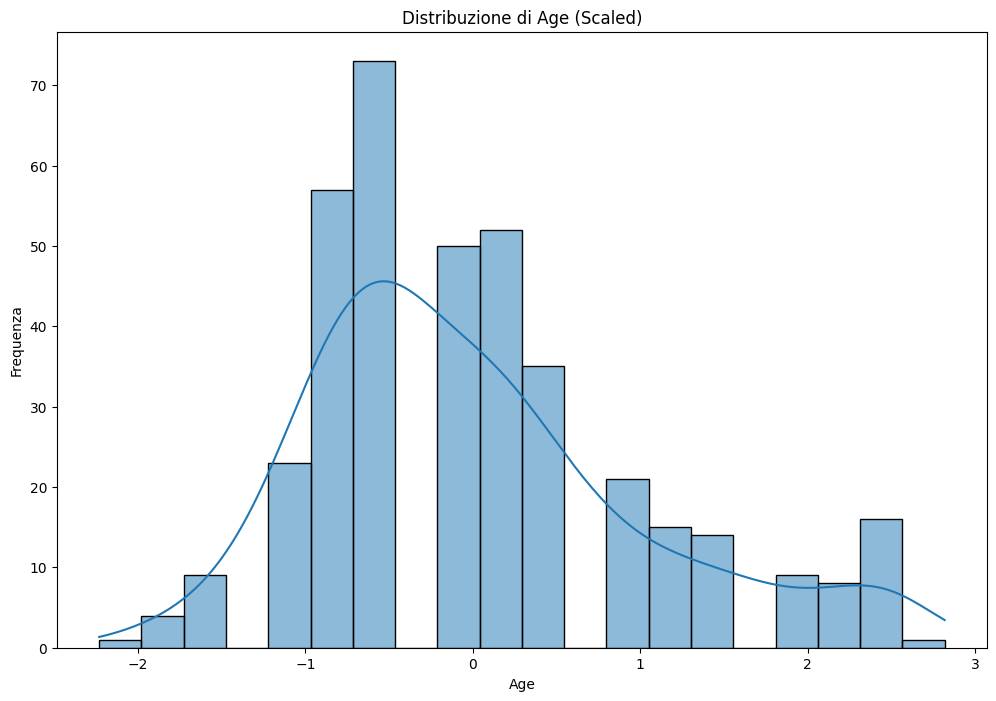

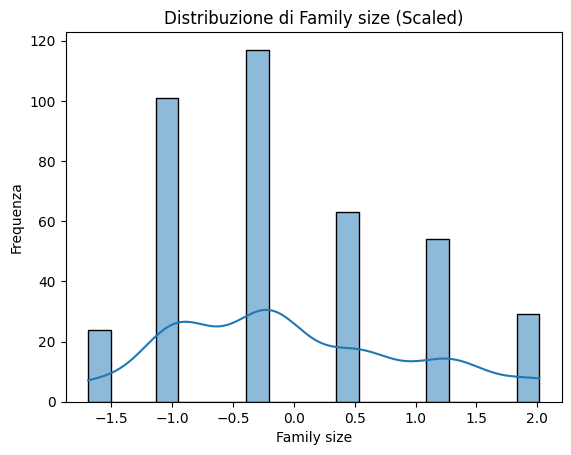

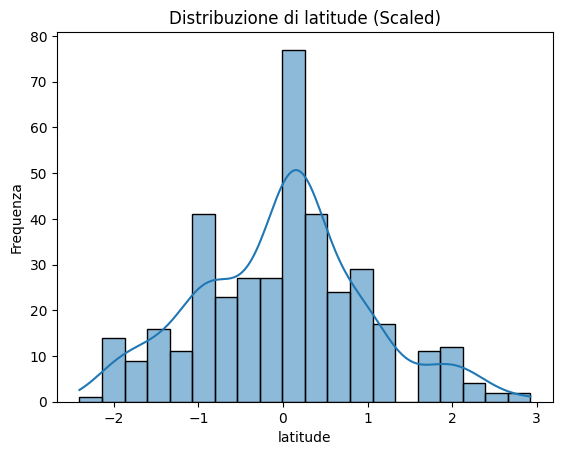

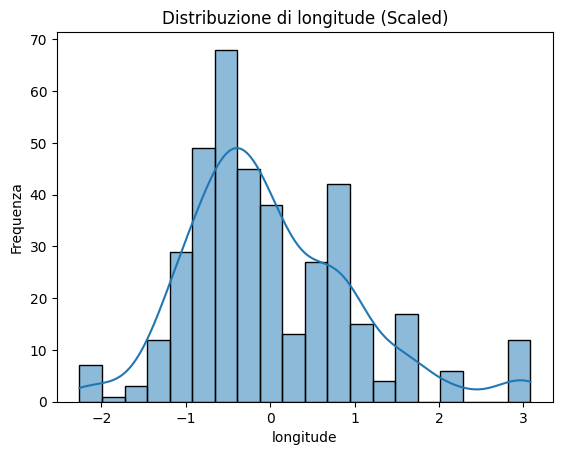

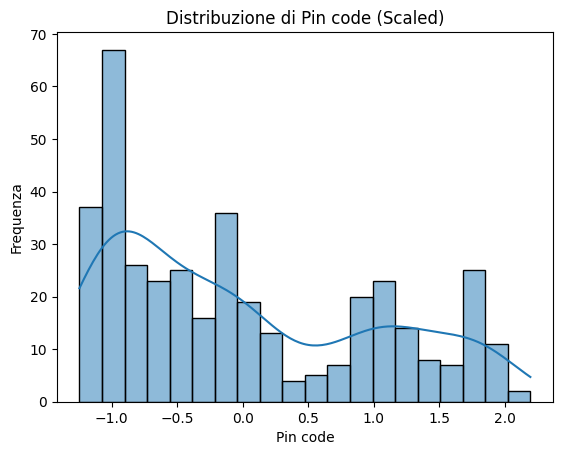

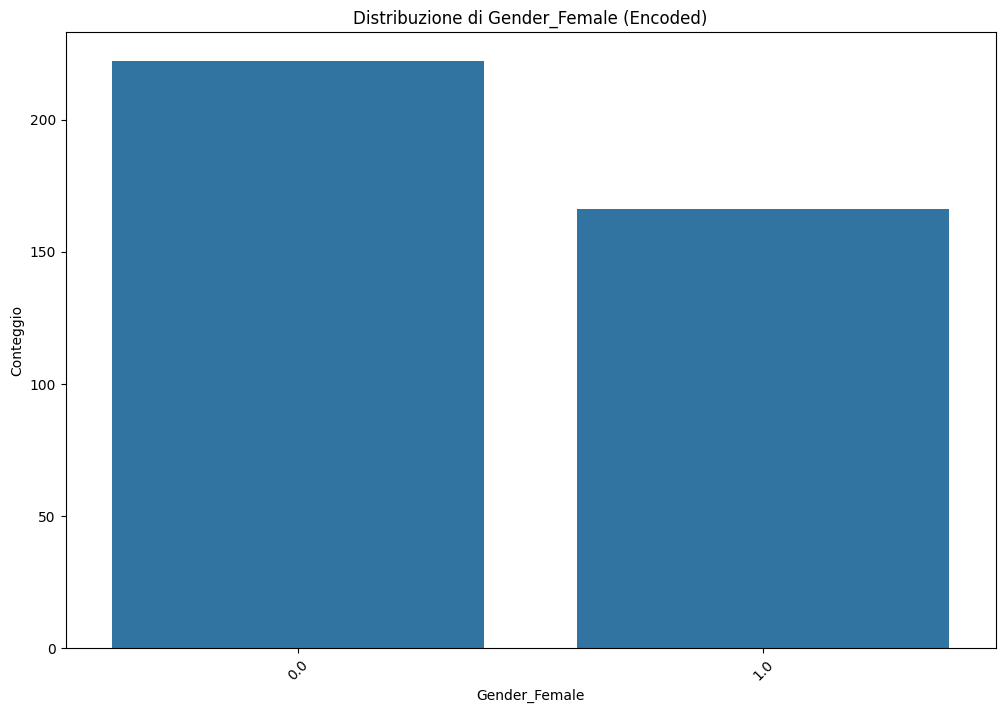

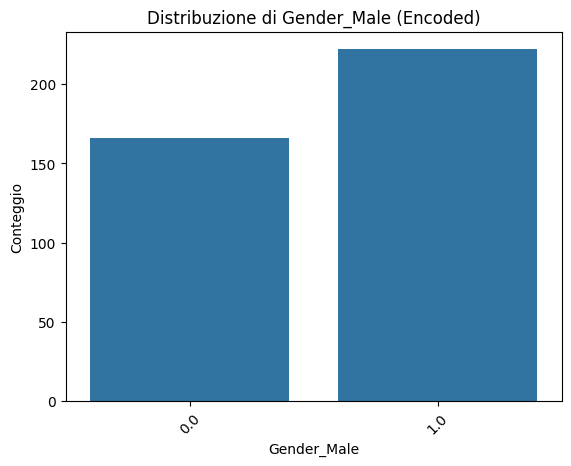

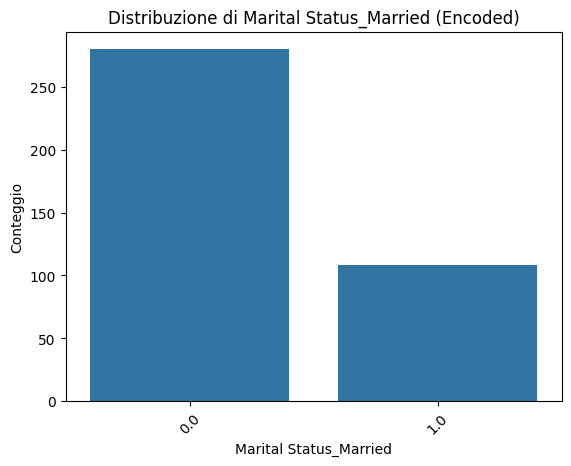

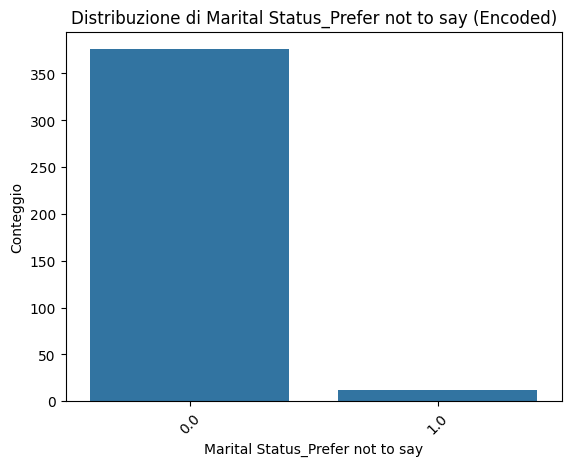

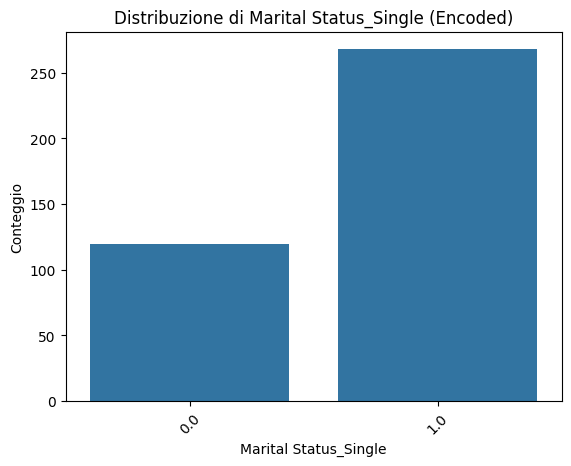

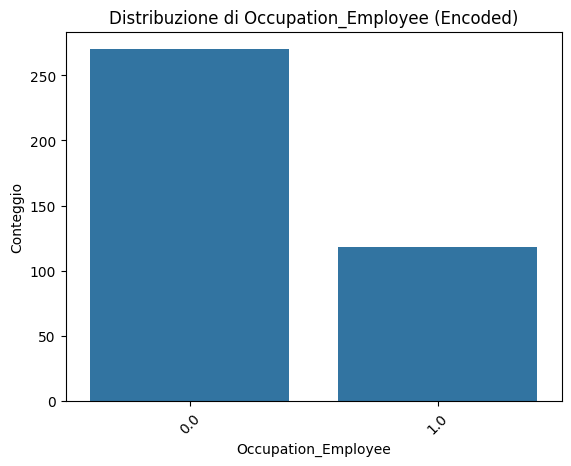

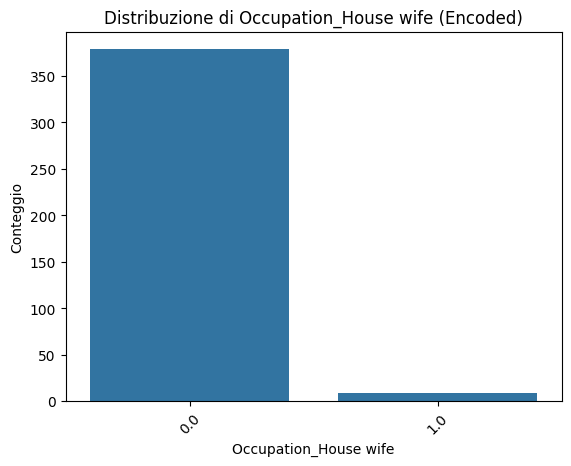

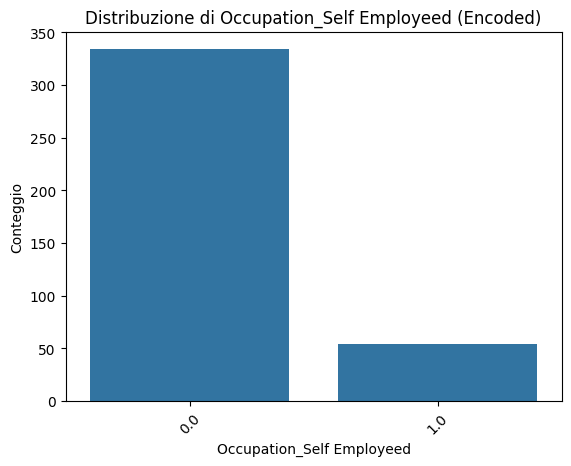

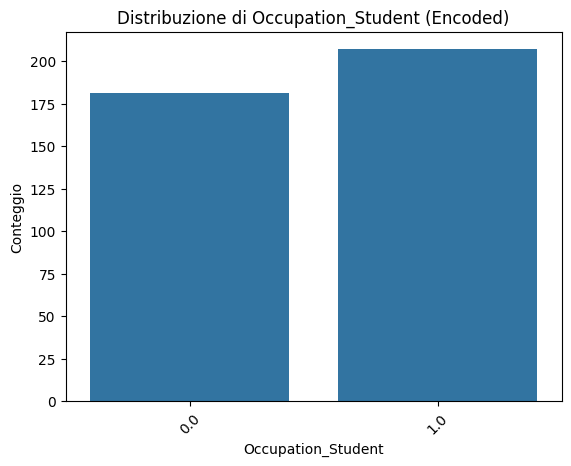

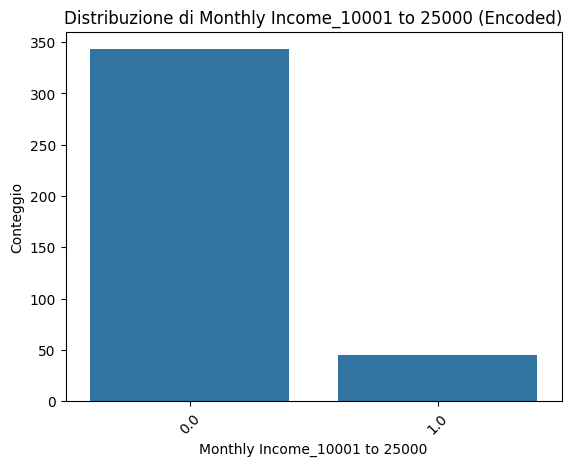

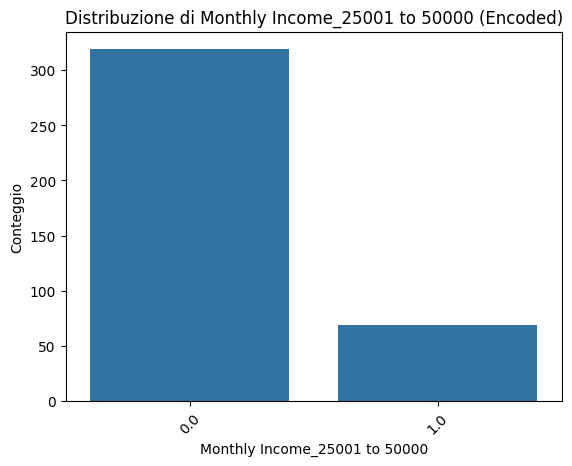

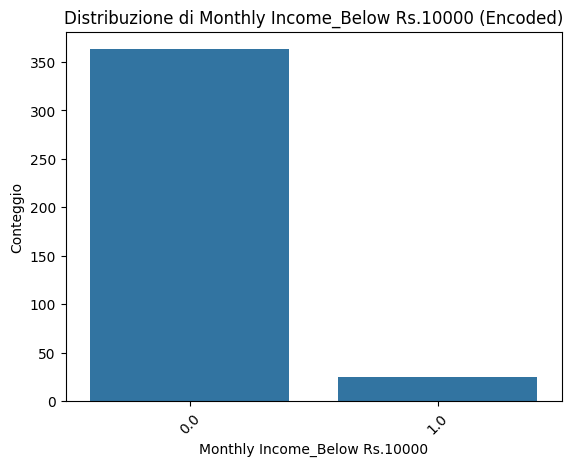

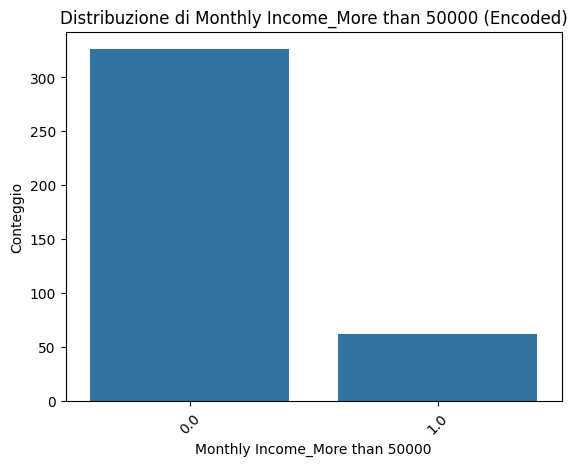

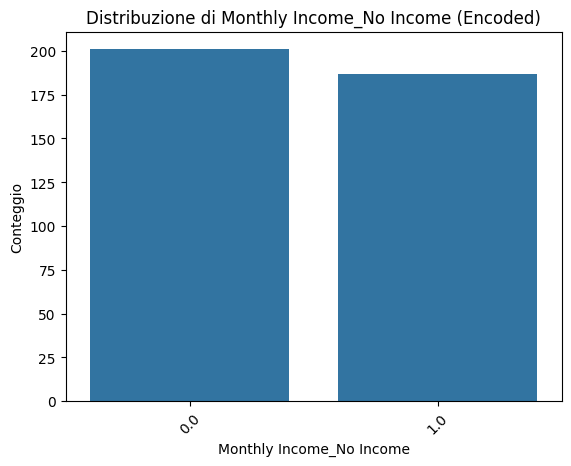

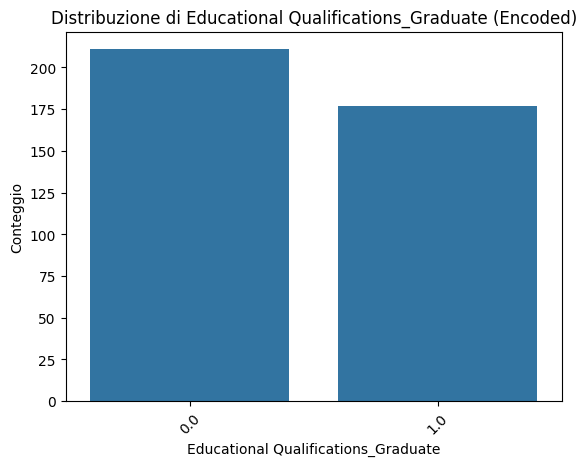

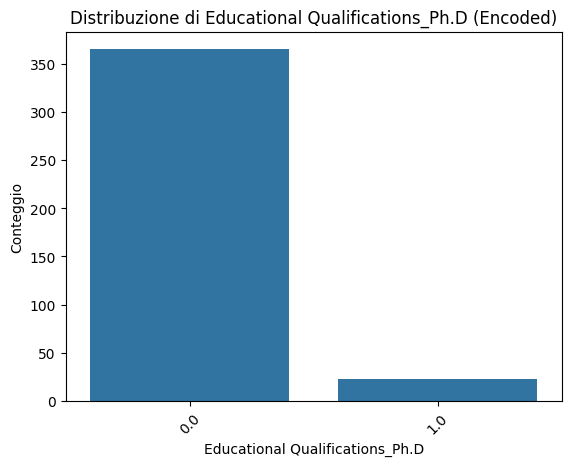

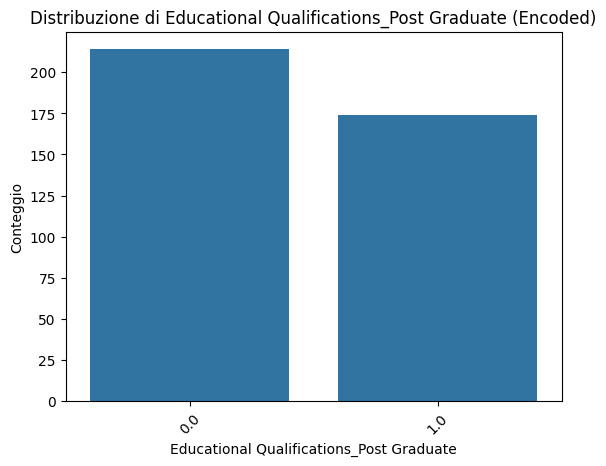

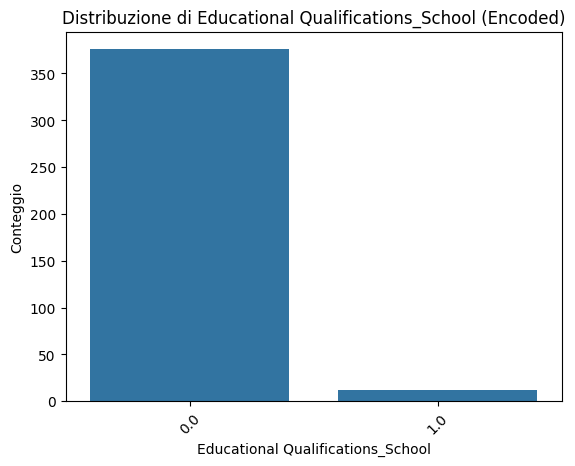

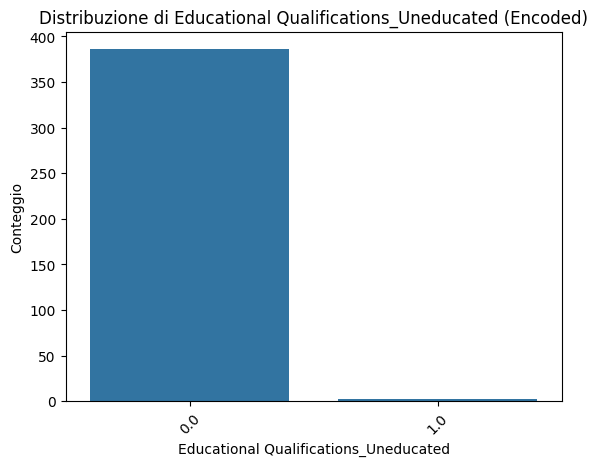

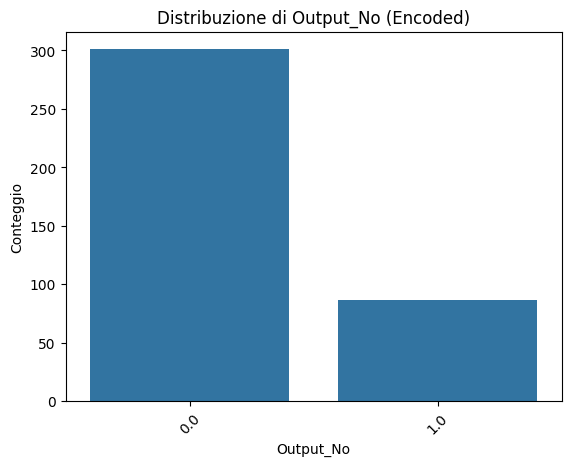

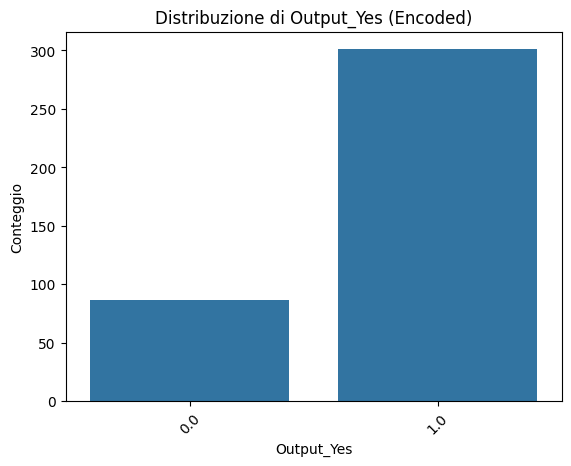

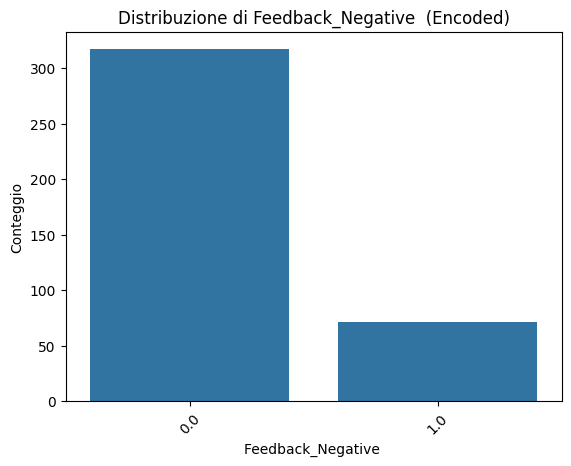

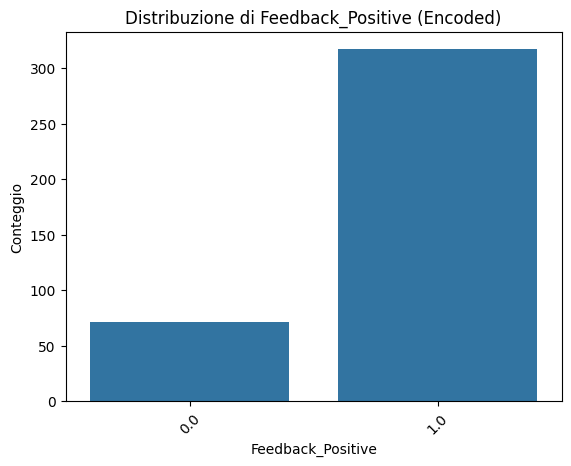

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assume che tu abbia già applicato lo scaling e l'encoding al DataFrame
# Quindi, abbiamo df2_scaled per le colonne numeriche scalate e df2_encoded per le colonne categoriche codificate

# Visualizzazione delle distribuzioni delle colonne numeriche scalate utilizzando un istogramma per ciascuna colonna
plt.figure(figsize=(12, 8))
for col in df2_scaled.columns:
    sns.histplot(data=df2_scaled, x=col, kde=True, bins=20)
    plt.title(f'Distribuzione di {col} (Scaled)')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()

# Visualizzazione delle distribuzioni delle colonne categoriche codificate utilizzando grafici a barre
plt.figure(figsize=(12, 8))
for col in df2_encoded.columns:
    sns.countplot(data=df2_encoded, x=col)
    plt.title(f'Distribuzione di {col} (Encoded)')
    plt.xlabel(col)
    plt.ylabel('Conteggio')
    plt.xticks(rotation=45)
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definisci la variabile target
target_variable = df1['Feedback']

# Rimuovi la variabile target dal DataFrame codificato
X = df2_encoded
y = target_variable

# Suddivisione dei dati in training e testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza il classificatore Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Addestra il modello sul set di dati di addestramento
rf_classifier.fit(X_train, y_train)

# Effettua le predizioni sul set di dati di test
y_pred = rf_classifier.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualizza l'accuratezza e il report di classificazione
print("Accuratezza del modello:", accuracy)
print("\nReport di classificazione:\n", classification_rep)


Accuratezza del modello: 1.0

Report di classificazione:
               precision    recall  f1-score   support

   Negative        1.00      1.00      1.00        11
    Positive       1.00      1.00      1.00        67

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [21]:
# Prendi una riga casuale dal dataset di test
sample_row = X_test.sample(n=1, random_state=42)

# Utilizza il modello addestrato per prevedere la variabile target per il dato di input
predicted_class = rf_classifier.predict(sample_row)

# Visualizza la riga e la previsione del modello
print("Riga di input:")
print(sample_row)
print("\nPrevisto:", predicted_class)

Riga di input:
     Gender_Female  Gender_Male  Marital Status_Married  \
296            0.0          1.0                     0.0   

     Marital Status_Prefer not to say  Marital Status_Single  \
296                               0.0                    1.0   

     Occupation_Employee  Occupation_House wife  Occupation_Self Employeed  \
296                  0.0                    0.0                        0.0   

     Occupation_Student  Monthly Income_10001 to 25000  ...  \
296                 1.0                            0.0  ...   

     Monthly Income_No Income  Educational Qualifications_Graduate  \
296                       1.0                                  0.0   

     Educational Qualifications_Ph.D  \
296                              0.0   

     Educational Qualifications_Post Graduate  \
296                                       1.0   

     Educational Qualifications_School  Educational Qualifications_Uneducated  \
296                                0.0             